<h2>Table of Contents</h2>


<p>In this project, you will classify  Fashion-MNIST dataset using convolutional neural networks.</p>
<ul>
  
<ul>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Q1">Questions 1: Create a Dataset Class</a></li>
<li><a href="#Q2">Define Softmax, Criterion function, Optimizer and Train the Model</a></li>

</ul>


</ul>

<p>Estimated Time Needed: <b>30 min</b></p>
<hr>


<a name="Preparation"><h2 id="Preparation" >Preparation</h2></a>


In [41]:
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
from torch.utils.data import DataLoader
torch.manual_seed(0)

In [42]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image

In [43]:
def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape((IMAGE_SIZE, IMAGE_SIZE)))
  plt.title('y = ' + str(data_sample[1]))

<a name="Q1"><h2 id="Q1">Questions 1: Create a Dataset Class</h2></a>


In this section, you will load a Dataset object, but first you must transform the dataset. Use the <code>Compose</code> function to perform the following transforms:.
<ol>
    <li>Use the transforms object to<code> Resize </code> to resize the image.</li>
    <li>Use the transforms object to<code> ToTensor </code> to convert the image to a tensor.</li>
</ol>

You will then take a screen shot of your validation data.


Use the Compose function to compose the transforms


In [44]:
IMAGE_SIZE = 16

composed = transforms.Compose(
    [
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor()
    ]
)

Create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>. You will be asked to take a screenshot of several samples.


<b>Hint:</b>
<code>dsets.FashionMNIST(root= '.fashion/data', train=???, transform=composed,  download=True)</code>


In [45]:
# Enter your code here
dataset_train = dsets.FashionMNIST(root='./data', train=True, download=True, transform=composed)
dataset_val = dsets.FashionMNIST(root='./data', train=False, download=True, transform=composed)

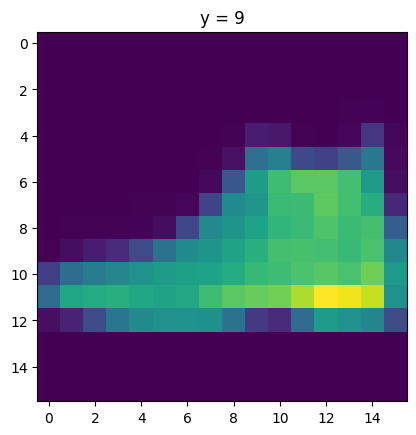

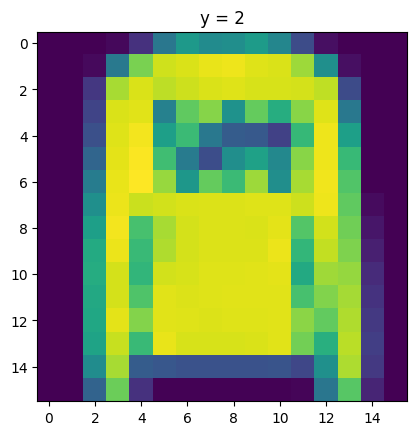

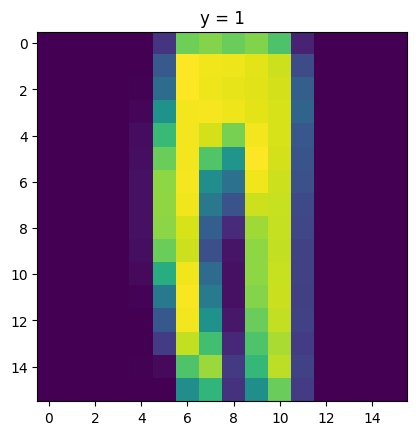

In [46]:
for n, data_sample in enumerate(dataset_val):
  show_data(data_sample)
  plt.show()
  if n == 2:
    break

<a name="Q2"><h2 id="Q2">Questions 2</h2></a>
Create a Convolutional Neural Network class using ONE of the following constructors.  Train the network using the provided code then provide a screenshot of your training cost and accuracy with your validation data.


Constructor  using Batch Norm


In [47]:
class CNNBatch(nn.Module):

  # Constructor
  def __init__(self, out_1=16, out_2=32, number_of_Classes=10):
    super(CNNBatch, self).__init__()

    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
    self.conv1_bn = nn.BatchNorm2d(out_1)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)

    self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
    self.conv2_bn = nn.BatchNorm2d(out_2)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)

    self.fc1 = nn.Linear(out_2*4*4, 10)
    self.conv3_bn = nn.BatchNorm1d(10)

  # Prediction
  def forward(self, x):
    x = self.cnn1(x)
    x = self.conv1_bn(x)
    x = torch.relu(x)
    x = self.maxpool1(x)

    x = self.cnn2(x)
    x = self.conv2_bn(x)
    x = torch.relu(x)
    x = self.maxpool2(x)

    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.conv3_bn(x)

    return x

In [48]:
class CNN(nn.Module):

  # Constructor
  def __init__(self, out_1=16, out_2=32, number_of_Classes=10):
    super(CNN, self).__init__()

    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)

    self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)

    self.fc1 = nn.Linear(out_2*4*4, 10)

  # Prediction
  def forward(self, x):
    x = self.cnn1(x)
    x = torch.relu(x)
    x = self.maxpool1(x)

    x = self.cnn2(x)
    x = torch.relu(x)
    x = self.maxpool2(x)

    x = x.view(x.size(0), -1)
    x = self.fc1(x)

    return x

In [49]:
# train loader  and validation loader
train_loader = DataLoader(dataset=dataset_train, batch_size=100)
test_loader = DataLoader(dataset=dataset_val, batch_size=100)

In [50]:
# Convolutional Neural Network object
model_cnn = CNN(out_1=16, out_2=32, number_of_Classes=10)
model_cnn_batch = CNNBatch(out_1=16, out_2=32, number_of_Classes=10)

Create the objects for the criterion and the optimizer named <code>criterion</code> and <code>optimizer</code>. Make the optimizer use SGD with a learning rate of 0.1 and the optimizer use Cross Entropy Loss

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.SGD(model_cnn.parameters(), lr=0.1)
optimizer_cnn_batch = torch.optim.SGD(model_cnn_batch.parameters(), lr=0.1)

Code used to train the model

In [52]:
import time
start_time = time.time()
print(start_time)

COST_LIST = []
ACC_LIST = []
N_Test = len(dataset_val)
n_epochs = 5

for epoch in range(n_epochs):
  cost = 0
  model_cnn.train()

  for x, y in train_loader:
    optimizer_cnn.zero_grad()
    z = model_cnn(x)
    loss = criterion(z, y)
    loss.backward()
    optimizer_cnn.step()
    cost += loss.item()
  COST_LIST.append(cost)

  correct = 0

  #perform a prediction on the validation  data
  model_cnn.eval()
  for x_test, y_test in test_loader:
    z = model_cnn(x_test)
    _,yhat = torch.max(z, 1)
    correct += (yhat == y_test).sum().item()
  accuracy = correct / N_Test
  ACC_LIST.append(accuracy)

  print(f'Epoch: {epoch},Tain Loss: {cost}, Test Accuracy: {accuracy}')


1736634459.0284455
Epoch: 0,Tain Loss: 471.78252869844437, Test Accuracy: 0.7995
Epoch: 1,Tain Loss: 288.6385860443115, Test Accuracy: 0.8359
Epoch: 2,Tain Loss: 249.6457710415125, Test Accuracy: 0.8488
Epoch: 3,Tain Loss: 229.81897249817848, Test Accuracy: 0.8591
Epoch: 4,Tain Loss: 216.95074692368507, Test Accuracy: 0.8653


<ipython-input-53-99d8a95bc66c>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


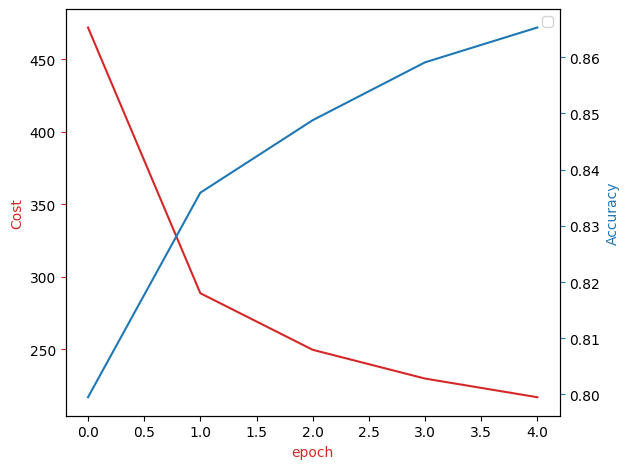

In [53]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(COST_LIST, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(ACC_LIST, color=color)
ax2.set_xlabel('epoch', color=color)
ax2.set_ylabel('Accuracy', color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()
plt.legend()

In [54]:
import time
start_time = time.time()
print(start_time)

COST_LIST = []
ACC_LIST = []
N_Test = len(dataset_val)
n_epochs = 5

for epoch in range(n_epochs):
  cost = 0
  model_cnn.train()

  for x, y in train_loader:
    optimizer_cnn_batch.zero_grad()
    z = model_cnn_batch(x)
    loss = criterion(z, y)
    loss.backward()
    optimizer_cnn.step()
    cost += loss.item()
  COST_LIST.append(cost)

  correct = 0

  #perform a prediction on the validation  data
  model_cnn.eval()
  for x_test, y_test in test_loader:
    z = model_cnn_batch(x_test)
    _,yhat = torch.max(z, 1)
    correct += (yhat == y_test).sum().item()
  accuracy = correct / N_Test
  ACC_LIST.append(accuracy)

  print(f'Epoch: {epoch},Tain Loss: {cost}, Test Accuracy: {accuracy}')

1736635273.7779593
Epoch: 0,Tain Loss: 1697.5642714500427, Test Accuracy: 0.0946
Epoch: 1,Tain Loss: 1697.5642714500427, Test Accuracy: 0.0946
Epoch: 2,Tain Loss: 1697.5642714500427, Test Accuracy: 0.0946
Epoch: 3,Tain Loss: 1697.5642714500427, Test Accuracy: 0.0946
Epoch: 4,Tain Loss: 1697.5642714500427, Test Accuracy: 0.0946


<ipython-input-55-99d8a95bc66c>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


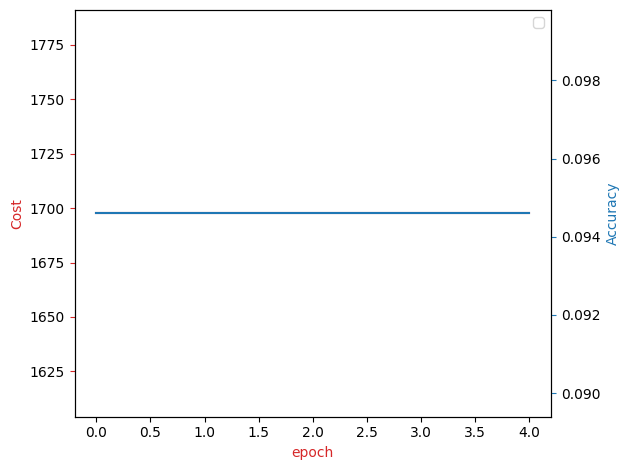

In [55]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(COST_LIST, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(ACC_LIST, color=color)
ax2.set_xlabel('epoch', color=color)
ax2.set_ylabel('Accuracy', color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()
plt.legend()